## N-LAYER QGB <a id="N-LAYER QGB"></a>

In [2]:
import numpy as np

from qiskit import QuantumCircuit,QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
from qiskit.result import marginal_distribution

from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator

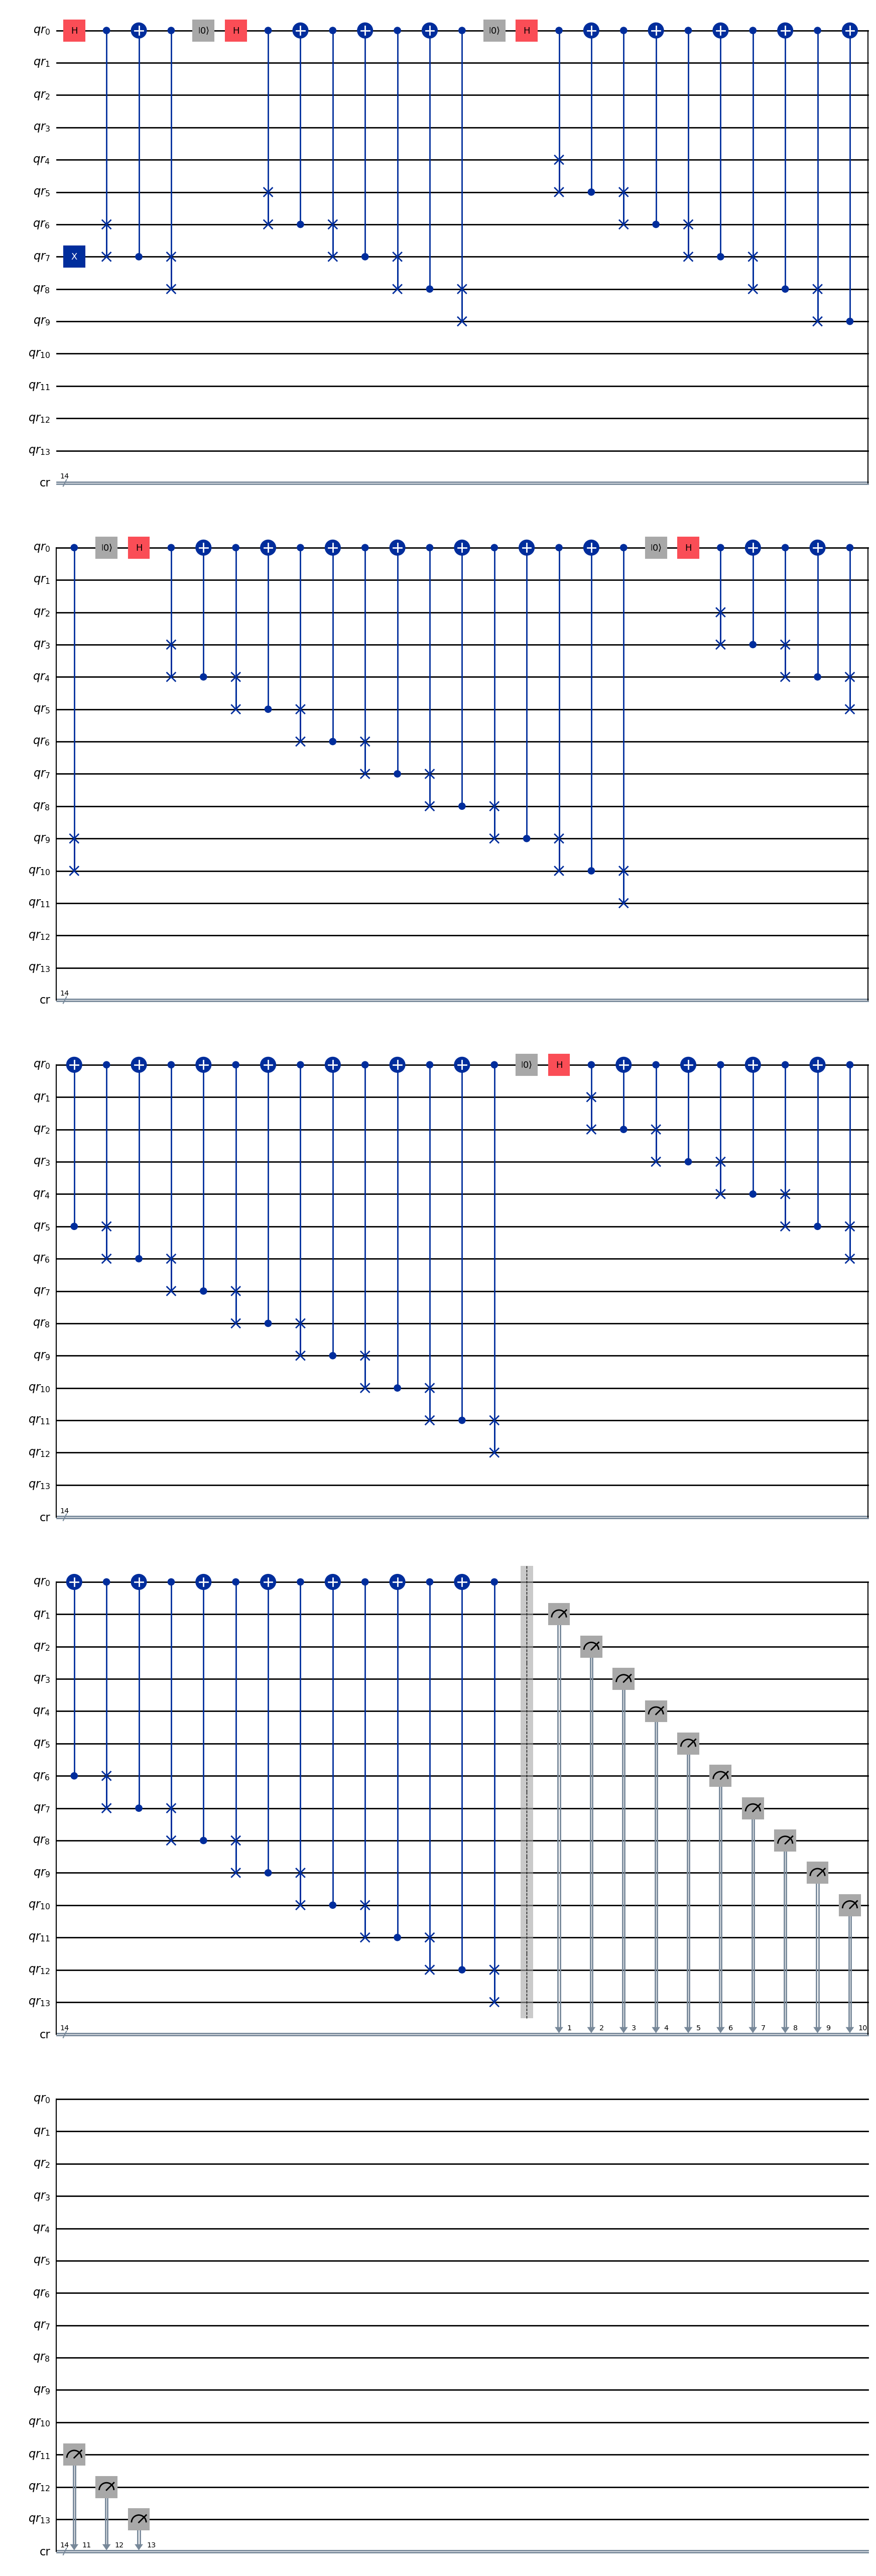

In [3]:
#paramters
n=6 # no of layers
num_qubits = int(2*(n+1)) #no of qubits
m= int(n+1) #staritng position

#Register
qr= QuantumRegister(num_qubits, name="qr")
cr= ClassicalRegister(num_qubits,name="cr")
QGB = QuantumCircuit(qr,cr)

#Initializing at starting position
QGB.x(m)

#steps of Quantum Galton Board
for i in range(0,n):
        QGB.h(0)
        p=int(m-i)
        for j in range(i+1):
            r= int(p + 2*j)
            QGB.cswap(0,r-1,r)
            QGB.cx(r,0)
            QGB.cswap(0,r,r+1)
            if r+1 == m+i+1 and r+1 != 2*n+1:
                QGB.reset(0)
            elif r+1 != 2*n+1:
                QGB.cx(r+1,0)
QGB.barrier()

#measurement
for i in range(1,num_qubits):
    QGB.measure(qr[i],cr[i])


QGB.draw("mpl")

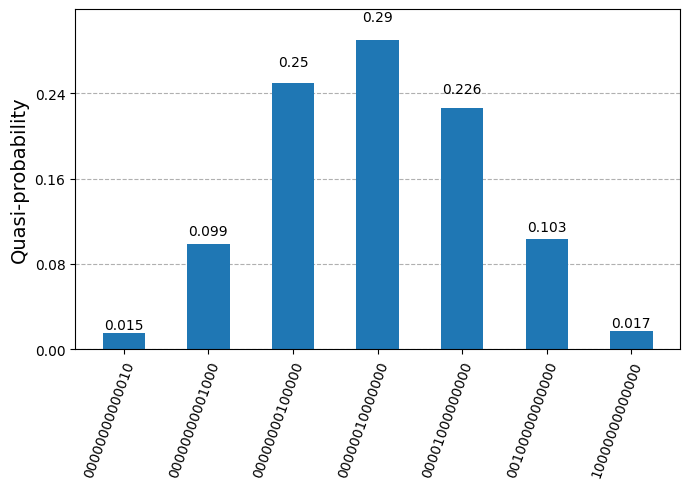

In [4]:
backend = AerSimulator()

pm = generate_preset_pass_manager(backend = backend)
qc= pm.run(QGB)

sampler = Sampler(mode=backend)
count = sampler.run([qc], shots= 1000).result()[0].data.cr.get_counts()

plot_distribution(count)